# SAVANT Aerosol Lidar Visualization

In [110]:
import sys
import subprocess       # This won't work with anaconda, and do NOT recommend you to use conda
import glob # This is the system default package

import numpy as np
try:
    from matplotlib import pyplot as plt
except:
    print("The library matplotlib can't be loaded. Please wait for the installation and re-run program!")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
    

from atmospheric_lidar import raymetrics

In [111]:
file_paths = sorted(glob.glob('D:/GitHub/SAVANT-Lidar-Paraview/Aerosol/2018-10-17-18/0320/R*'))
print("%s files found." % len(file_paths))

160 files found.


## Split the files in separate PPI and RHI groups

In [112]:
# Get the scan info of the first file
f = raymetrics.ScanningFile(file_paths[0], get_name_by_order=True)
previous_azimuth = f.azimuth_angle
previous_zenith = f.zenith_angle

In [113]:
file_groups = []
current_group = []

for n, file_path in enumerate(file_paths):
    f = raymetrics.ScanningFile(file_path, get_name_by_order=True, import_now=False)  # Just read the header, for faster IO
     
    if (previous_azimuth == f.azimuth_angle) or (previous_zenith == f.zenith_angle):
        current_group.append(file_path)
    else:
        file_groups.append(current_group.copy())  # This group is finished
        previous_azimuth = f.azimuth_angle
        previous_zenith = f.zenith_angle
        current_group = []
        
file_groups.append(current_group)  # Apend also the last group 

print("Total number of groups %s." %  len(file_groups))    

Total number of groups 3.


In [114]:
# Load each measurement 
scans = []
for group_paths in file_groups:
    m = raymetrics.ScanningLidarMeasurement(group_paths, get_name_by_order=True)
    scans.append(m)

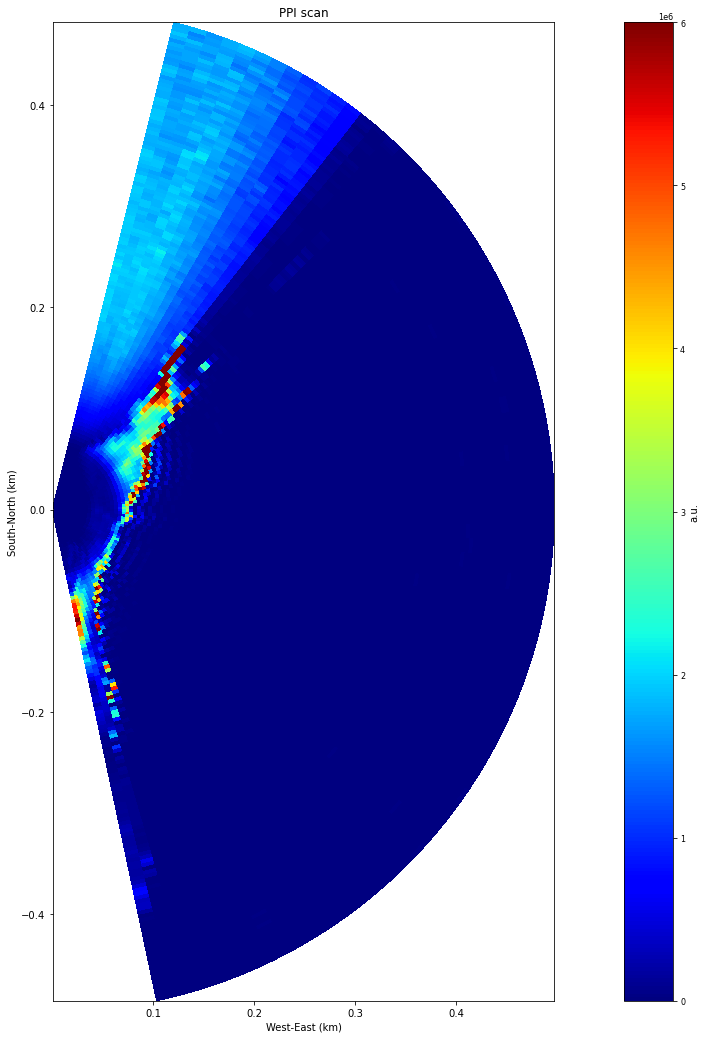

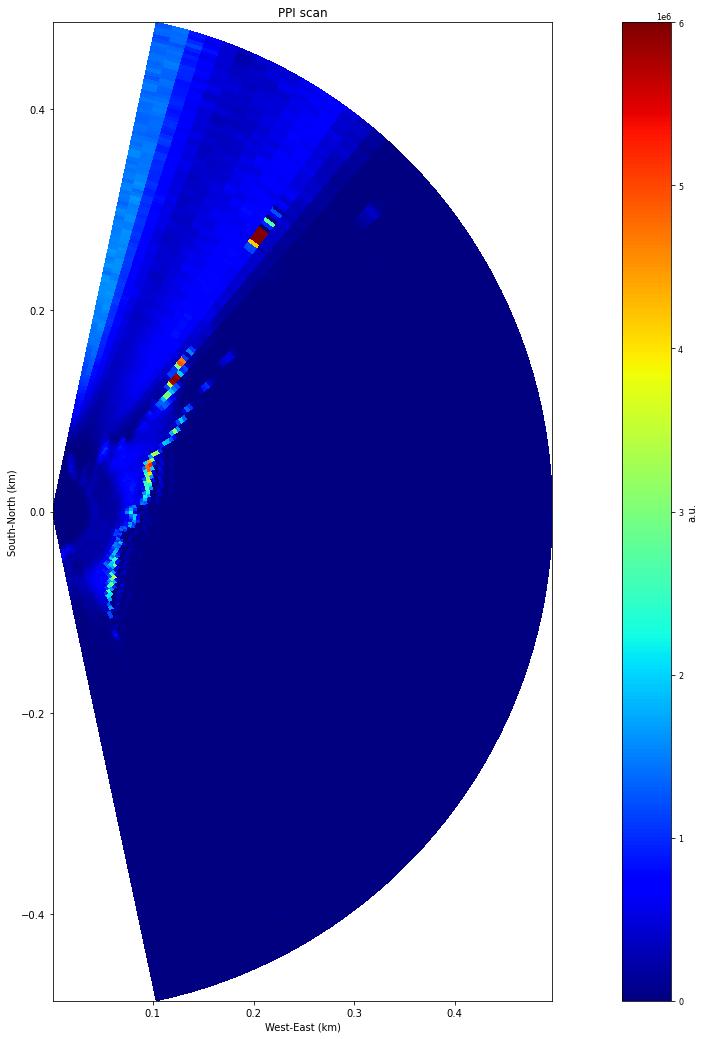

In [122]:
# Plot the PPI scans
for m in scans[1:]:  # Reject the first scan that contains only one file.
    c = m.channels[0]  # Get the measurement channel, containing data from all files
    c.plot_ppi(figsize=(25, 18),    # Size of the plots
            z_min=0,z_max=500, # Range limits
            vmin=0, vmax=6e6,   # Image limits
            mask_noise=False)   # Cut blank regions

Text(0, 0.5, 'Signal (mV)')

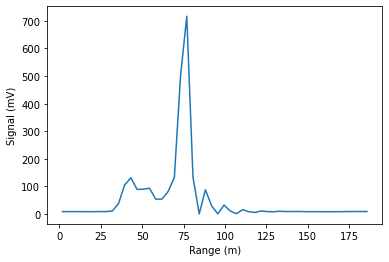

In [116]:
# Investigate the ringing of he detector
profile_idx = 40  # Number of profile ot plot
max_z_idx = 50   # Maximum range bin to plot

m = scans[1]
c = m.channels[0]
plt.plot(c.z[:max_z_idx], c.matrix[40, :max_z_idx])
plt.xlabel('Range (m)')
plt.ylabel('Signal (mV)')

Make sure to remove the solid object by filtering the upper threshold of 700 mV

Compare with the initial release and see what we find

Dump the mean and SD value of the background noise, the ring area, and the gap blue area, and see if they are close.



In [117]:
print(np.shape(c.matrix))
np.savetxt('pp.txt', c.rc, delimiter=',')



(78, 16380)


In [118]:
aa, bb = c._polar_to_ground(c.z / 1000., c.azimuth_angles, c.zenith_angles)
print(np.shape(c.rc))


(78, 16380)


### Now print out the keys to the dictionary of the c.data

In [119]:

for key in c.data.keys():
    print(c.data[key])

[9.14878772 9.17495203 9.11390197 ... 9.0964591  9.20111634 9.17495203]
[8.84004884 8.84004884 8.87260887 ... 8.83190883 8.7993488  8.91330891]
[8.82376882 8.76678877 8.75864876 ... 8.85632886 8.85632886 8.92958893]
[9.14878772 9.13134485 9.11390197 ... 9.13134485 9.14006628 9.14006628]
[9.10115526 9.08237062 9.11993989 ... 9.09176294 9.10115526 9.11993989]
[8.86098029 8.8173731  8.80865167 ... 8.78248735 8.80865167 8.79993023]
[8.80865167 8.78248735 8.85225885 ... 8.80865167 8.86098029 8.82609454]
[8.80865167 8.79120879 8.77376592 ... 8.79120879 8.86098029 8.73888017]
[8.79120879 8.84004884 8.82376882 ... 8.77492877 8.88074888 8.80748881]
[8.80865167 8.86098029 8.82609454 ... 8.73888017 8.8173731  8.78248735]
[8.84004884 8.79120879 8.79120879 ... 8.80748881 8.84818885 8.80748881]
[9.13308913 9.11680912 9.12494912 ... 9.12494912 9.18192918 9.1982092 ]
[9.12262341 9.15750916 9.14878772 ... 9.12262341 9.14006628 9.11390197]
[8.79993023 8.80865167 8.79993023 ... 8.79993023 8.82609454 8.77